In [2]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 


In [4]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=7287f904e899781ff8df7a1bcd6b148fe465d2db759863ffebd7da09229d2add
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [6]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import cv2
import numpy as np
from PIL import Image
from keras.models import load_model
from twilio.rest import Client
from playsound import playsound
from keras.utils import img_to_array
import matplotlib.pyplot as plt

In [14]:
model=load_model(r'/content/forests.h5')

In [15]:
def prediction(img_path):
    i = cv2.imread(img_path)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    img = Image.open(img_path)
    img = img.resize((128,128))
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = model.predict(x)
    plt.imshow(i)
    if(pred==[[1.]]) :
        message=client.messages \
        .create(
          body='FOREST FIRE IS DECTECTED IN AREA,stay alert',
          #use twilio free number
          from_='+12535288281',
          #to number
          to='+918610505460')
        print(message.sid)
        print('Fire Detected')
        print('SMS sent!')
    else:
         print("NO FOREST FIRE DETECTED")
         print("no message sent")

In [17]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


1/1 [==============================] - 0s 384ms/step
NO FOREST FIRE DETECTED
no message sent


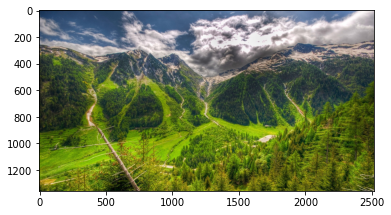

In [18]:
prediction(r'/content/gdrive/My Drive/Dataset/test_set/forest/146019.jpg')

1/1 [==============================] - 0s 30ms/step
NO FOREST FIRE DETECTED
no message sent


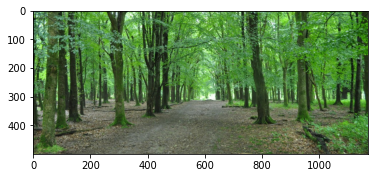

In [20]:
prediction(r'/content/gdrive/My Drive/Dataset/test_set/forest/1170x500_Ireland_web.jpg')

1/1 [==============================] - 0s 25ms/step
SM77f63d50de8a2fcfeb3732c80be8bcee
Fire Detected
SMS sent!


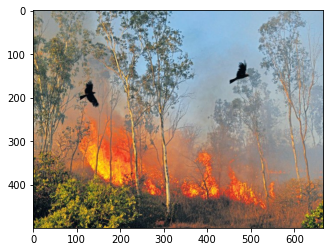

In [21]:
prediction(r'/content/gdrive/My Drive/Dataset/test_set/with fire/599857.jpg')

1/1 [==============================] - 0s 27ms/step
SM49e398e4e83cf1ae20713220b18d8547
Fire Detected
SMS sent!


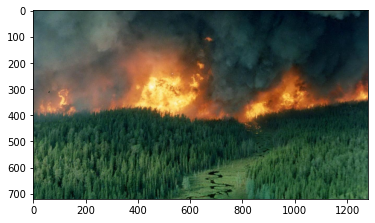

In [22]:
prediction(r'/content/gdrive/My Drive/Dataset/test_set/with fire/RED7_May29_1986.jpg')